IMPORTING LIBRARIES

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATASET

In [57]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [-2,-1]]
print(x)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


ESTIMATE BANDWIDTH

In [58]:
from sklearn.cluster import estimate_bandwidth
bw = estimate_bandwidth(x, quantile=0.2, n_samples=len(x))
print("ESTIMATED BANDWIDTH: ", bw)

ESTIMATED BANDWIDTH:  27.161411938994306


APPLYING THE MEAN SHIFT

In [59]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=bw)
ms.fit(x)


MeanShift(bandwidth=np.float64(27.161411938994306))

CLUSTER CENTERS

In [60]:
centers = ms.cluster_centers_
labels = ms.labels_

print("CLUSTER CENTERS:\n", centers)
print("LABELS FOR EACH CUSTOMER:\n", labels)

CLUSTER CENTERS:
 [[54.95402299 48.73563218]
 [78.02325581 76.58139535]
 [80.86842105 21.21052632]]
LABELS FOR EACH CUSTOMER:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


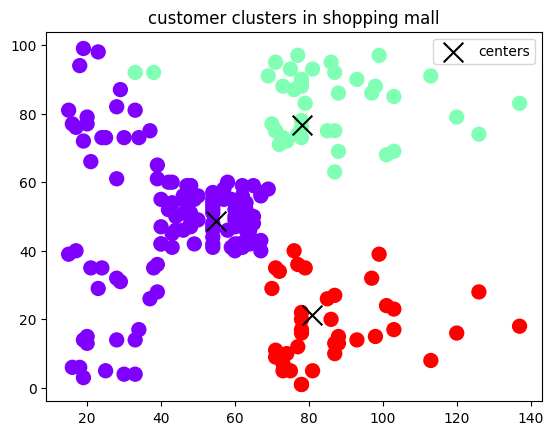

In [61]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=labels, s=100, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], color='black', marker='x', s=200, label="centers")
plt.title("customer clusters in shopping mall")
plt.legend()
plt.show()